In [3]:
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier



# Chargement des fichiers CSV
benin_data = pd.read_csv("../../data/dataBell_DNS Dataset/features_domain_benign_csv.csv")
malware_data = pd.read_csv("../../data/Bell_DNS Dataset/features-domain_Malware.csv")
phishing_data = pd.read_csv("../../data/Bell_DNS Dataset/features-domain_phishing.csv")
spam_data = pd.read_csv("../../data/dataBell_DNS Dataset/features-domain_Spam.csv")

# Ajout de la colonne 'Class' 
benin_data['Class'] = 'Benin'
malware_data['Class'] = 'Malware'
phishing_data['Class'] = 'Phishing'
spam_data['Class'] = 'Spam'


# Concaténation de tous les ensembles de données
all_data = pd.concat([benin_data, malware_data, phishing_data, spam_data], ignore_index=True)


In [4]:
# Spécifier la colonne cible [le faire avant l'encodage ]
y = all_data['Class']

In [4]:
####################### Ne pas executer ce code ################################
###############################################################################

#Convertir les variables catégorielles en variables numériques

#all_data_encoded = pd.get_dummies(all_data, columns=['Class'], drop_first=True)

In [78]:
################################ Ne pas executer c'esr juste un exemple ##############


############## Tresimportant pour selectionner les attribut numeriques ###### il faut d'abord affihcer les types des donnees ##########


# Séparer les caractéristiques numériques et catégorielles

X_numerical = all_data.select_dtypes(include='number')
X_categorical = all_data.select_dtypes(exclude='number')

In [5]:
# Séparer les caractéristiques numériques et catégorielles

#X_numerical = all_data.select_dtypes(include='number') ########### jai du mal a comprendre comment il fonctionne lui

X_numerical = all_data.select_dtypes(include=['int64', 'float64'])

X_categorical = all_data.select_dtypes(exclude='number')

In [69]:
############################### Ne pas executer ce code ######################################
#############################################################################################


# Imputation des valeurs manquantes pour les caractéristiques numériques
numerical_imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = pd.DataFrame(numerical_imputer.fit_transform(X_numerical), columns=X_numerical.columns)

In [6]:
X_numerical.var()

subdomain             2.469210e-01
len                   5.041374e+01
numeric_percentage    4.878897e+01
entropy               3.723222e-01
dec_8                 0.000000e+00
dec_32                6.559620e-03
oc_8                  0.000000e+00
oc_32                 7.974164e-05
hex_8                 0.000000e+00
hex_32                0.000000e+00
puny_coded            4.682994e-03
Alexa_Rank            4.153903e+12
Page_Rank             0.000000e+00
dtype: float64

In [7]:
print(X_numerical.shape)

(50159, 13)


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# 2. Vérification des colonnes vides
if X_numerical.isnull().any().any():
    # Imputer les valeurs manquantes pour les caractéristiques numériques
    numerical_imputer = SimpleImputer(strategy='mean')
    X_numerical_imputed = pd.DataFrame(numerical_imputer.fit_transform(X_numerical), columns=X_numerical.columns)

    #prepocessing des features numeriques soit  avec le  LabelEncoder soit le MinMaxScaler()

    # Création d'un scaler
    scaler = MinMaxScaler()

    # Ajustement du scaler aux données
    scaler.fit(X_numerical_imputed)

    # Transformation des fonctionnalités numériques
    scaled_numeric_features = scaler.transform(X_numerical_imputed)


    print(scaled_numeric_features)

    # Apres transformation Création d' un DataFrame à partir des valeurs transformées

    scaled_df = pd.DataFrame(scaled_numeric_features, columns=X_numerical_imputed.columns)

    # Afficher le DataFrame avec les valeurs transformées
    print("Après transformation")
    print(scaled_df)

    total_size = scaled_df.shape
    print("Taille totale des caractéristiques numériques après transformations :", total_size)
else:
    print("Pas de valeurs manquantes dans les caractéristiques numériques. Aucune imputation nécessaire.")


[[0.00000000e+00 3.89610390e-02 0.00000000e+00 ... 0.00000000e+00
  1.63603505e-07 0.00000000e+00]
 [0.00000000e+00 3.89610390e-02 0.00000000e+00 ... 0.00000000e+00
  1.63603505e-07 0.00000000e+00]
 [1.00000000e+00 5.84415584e-02 0.00000000e+00 ... 0.00000000e+00
  1.63603505e-07 0.00000000e+00]
 ...
 [0.00000000e+00 7.79220779e-02 1.23188406e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.14285714e-02 6.43939394e-02 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.42857143e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Après transformation
       subdomain       len  numeric_percentage   entropy  dec_8  dec_32  oc_8   
0            0.0  0.038961            0.000000  0.384930    0.0     0.0   0.0  \
1            0.0  0.038961            0.000000  0.384930    0.0     0.0   0.0   
2            1.0  0.058442            0.000000  0.443538    0.0     0.0   0.0   
3            1.0  0.058442            0.000000  0.44353

In [9]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder


# Convertir les colonnes catégorielles en chaînes de caractères (parceque actuellement sa contient les int et les str il faut normaliser en str)
X_categorical = X_categorical.astype(str)

# Utiliser l'encodage ordinal pour transformer les données catégorielles en valeurs numériques
ordinal_encoder = OrdinalEncoder()
X_categorical_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_categorical), columns=X_categorical.columns)

# Réduire la dimension avec OneHotEncoder
# Supprimer les colonnes avec une variance en dessous d'un certain seuil
selector = VarianceThreshold(threshold=0.01)
X_categorical_reduced = selector.fit_transform(X_categorical_encoded)

# Mettez à jour la sélection des colonnes originales
original_categorical_columns = X_categorical.columns[selector.get_support()]

# Créer un DataFrame avec les colonnes originales
X_categorical_reduced_df = pd.DataFrame(X_categorical_reduced, columns=original_categorical_columns)

# Concaténer les caractéristiques numériques et catégorielles
X_combined = pd.concat([X_numerical_imputed, X_categorical_reduced_df], axis=1)


In [12]:
print(X_categorical.shape)

(50159, 23)


In [13]:
#on se rassure que tout est bien convertis pour eviter l'erreur plus bas

X_combined.columns = X_combined.columns.astype(str)


In [14]:
#La Class ne doit pas faire partir des features important car c'est la cible

# Imprimer les noms des colonnes pour déboguer
print(X_combined.columns)

# Supprimer les colonnes de classe s'il y en a
# class_columns_to_drop = ['Class_1', 'Class_2', 'Class_3']

class_columns_to_drop = ['Class']

existing_class_columns = set(class_columns_to_drop).intersection(X_combined.columns)

if existing_class_columns:
    X_combined = X_combined.drop(existing_class_columns, axis=1)

# Imprimer à nouveau les noms des colonnes pour vérifier
print(X_combined.columns)


Index(['subdomain', 'len', 'numeric_percentage', 'entropy', 'dec_8', 'dec_32',
       'oc_8', 'oc_32', 'hex_8', 'hex_32', 'puny_coded', 'Alexa_Rank',
       'Page_Rank', 'tld', 'sld', 'char_distribution', '1gram', '2gram',
       '3gram', 'longest_word', 'distance_from_bad_words', 'typos',
       'shortened', 'Domain_Name', 'Registrar', 'Registrant_Name',
       'Creation_Date_Time', 'Emails', 'Domain_Age', 'Organization', 'State',
       'Country', 'Name_Server_Count', 'Class'],
      dtype='object')
Index(['subdomain', 'len', 'numeric_percentage', 'entropy', 'dec_8', 'dec_32',
       'oc_8', 'oc_32', 'hex_8', 'hex_32', 'puny_coded', 'Alexa_Rank',
       'Page_Rank', 'tld', 'sld', 'char_distribution', '1gram', '2gram',
       '3gram', 'longest_word', 'distance_from_bad_words', 'typos',
       'shortened', 'Domain_Name', 'Registrar', 'Registrant_Name',
       'Creation_Date_Time', 'Emails', 'Domain_Age', 'Organization', 'State',
       'Country', 'Name_Server_Count'],
      dtype='obje

In [15]:
from sklearn.model_selection import StratifiedKFold #Pour effectuer une validation croisée stratifiée.
from sklearn.feature_selection import RFECV #La classe qui effectue la sélection de caractéristiques

# Modèle pour la sélection de fonctionnalités
estimator = DecisionTreeClassifier()

#je choisi le nombre de parametre
num_features_to_select = 8
rfe_cv = RFECV(estimator, step=1, cv=StratifiedKFold(10), verbose=1,n_jobs=-1, min_features_to_select=num_features_to_select)


# Créer une instance de RFECV
# rfe_cv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(10), verbose=1, n_jobs=-1)

# Ajuster RFECV sur les données
rfe_cv.fit(X_combined, y)

Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(), min_features_to_select=8, n_jobs=-1,
      verbose=1)

In [ ]:
#ne pas executer cette section

# Créer une instance de RFECV avec un nombre fixe de caractéristiques à sélectionner (20 dans cet exemple)
num_features_to_select = 20
rfe_cv = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=StratifiedKFold(10), verbose=1, n_jobs=-1, min_features_to_select=num_features_to_select)


# Créer une instance de RFECV avec un nombre fixe de caractéristiques à sélectionner (15 dans cet exemple)
num_features_to_select = 15
rfe_cv = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=StratifiedKFold(10), verbose=1, n_jobs=-1, n_features_to_select=num_features_to_select)


In [18]:
# Afficher les caractéristiques sélectionnées
selected_features = list(X_combined.columns[rfe_cv.support_])
print("Caractéristiques importantes (RFECV):")
print(selected_features)

Caractéristiques importantes (RFECV):
['subdomain', 'entropy', 'Alexa_Rank', 'sld', 'char_distribution', '2gram', 'shortened', 'Domain_Name']


In [19]:
import numpy as np

#j'utilise rfe_cv.support_ pour obtenir le masque booléen des caractéristiques sélectionnées par l'algorithme RFECV. Ensuite, vous utilisez X_combined.columns[rfe_cv.support_] pour sélectionner les colonnes correspondantes et les convertir en une liste de noms de caractéristiques.

# Afficher les caractéristiques sélectionnées avec leurs indices
selected_features_with_indices = list(zip(X_combined.columns[rfe_cv.support_], np.where(rfe_cv.support_)[0]))
print("Caractéristiques importantes (RFECV):")
for name, index in selected_features_with_indices:
    print(f"{name}: {index}")

Caractéristiques importantes (RFECV):
subdomain: 0
entropy: 3
Alexa_Rank: 11
sld: 14
char_distribution: 15
2gram: 17
shortened: 22
Domain_Name: 23


In [20]:
# Créer un dictionnaire indiquant le type de chaque colonne
column_types = {}
for column in X_numerical_imputed.columns:
    column_types[column] = 'Numerical'

for column in X_categorical_reduced_df.columns:
    column_types[column] = 'Categorical'

# Afficher les caractéristiques sélectionnées avec leurs indices et types
selected_features_with_indices_and_types = [(name, index, column_types[name]) for name, index in selected_features_with_indices]

print("Caractéristiques importantes (RFECV):")
for name, index, feature_type in selected_features_with_indices_and_types:
    print(f"{name} (Index {index}): {feature_type}")


Caractéristiques importantes (RFECV):
subdomain (Index 0): Numerical
entropy (Index 3): Numerical
Alexa_Rank (Index 11): Numerical
sld (Index 14): Categorical
char_distribution (Index 15): Categorical
2gram (Index 17): Categorical
shortened (Index 22): Categorical
Domain_Name (Index 23): Categorical


In [22]:
# a ne pas executer 

# Obtenir les indices des colonnes sélectionnées [[cas ou je ne definie pas le nombre d'element a selectionner donc l'algorithme se chager de le faire]]

#Pour obtenir la meme chose que plus haut ie 8 caracteristique il faut remplacer le get_support(...) par [[rfe_cv.get_support(indices=True)]]

# selector n'es pas definie dans la methode de selection des caracteristiqued mais plutot dans la section de diminution des features plus haut suivant le threshold

# donc ces deux chose different

# selected_columns_indices = selector.get_support(indices=True)
selected_columns_indices = rfe_cv.get_support(indices=True)


# Obtenir les noms des colonnes sélectionnées
selected_columns_names = X_combined.columns[selected_columns_indices]

# Afficher les caractéristiques sélectionnées avec leurs noms
selected_features_with_names = list(zip(selected_columns_indices, selected_columns_names))
print("Caractéristiques importantes (RFECV):")
print(selected_features_with_names)

Caractéristiques importantes (RFECV):
[(0, 'subdomain'), (3, 'entropy'), (11, 'Alexa_Rank'), (14, 'sld'), (15, 'char_distribution'), (17, '2gram'), (22, 'shortened'), (23, 'Domain_Name')]


In [23]:
## a ne pas executer   [[cas ou je ne definie pas le nombre d'element a selectionner donc l'algorithme se chager de le faire]]

# Afficher les caractéristiques sélectionnées avec leurs noms et types
selected_features_with_names_and_types = []

for index, name in selected_features_with_names:
    # Obtenir le type de la caractéristique
    feature_type = "Categorical" if name in original_categorical_columns else "Numerical"
    
    # Ajouter à la liste
    selected_features_with_names_and_types.append((name, feature_type))

print("Caractéristiques importantes (RFECV):")
for name, feature_type in selected_features_with_names_and_types:
    print(f"{name}: {feature_type}")

Caractéristiques importantes (RFECV):
subdomain: Numerical
entropy: Numerical
Alexa_Rank: Numerical
sld: Categorical
char_distribution: Categorical
2gram: Categorical
shortened: Categorical
Domain_Name: Categorical


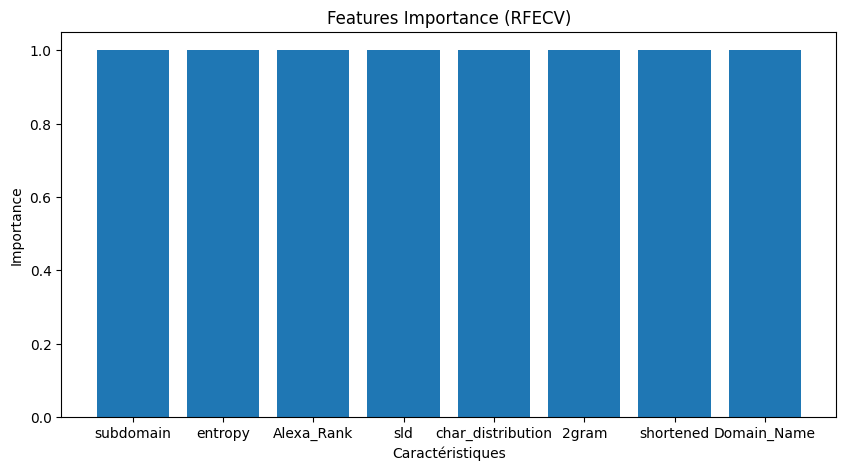

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Affichage des résultats
plt.figure(figsize=(10, 5))
plt.bar(selected_columns_names, np.ones(len(selected_columns_names)))
plt.title("Features Importance (RFECV)")
plt.xlabel("Caractéristiques")
plt.ylabel("Importance")
plt.show()